### Imports

In [1]:
import matplotlib.pyplot as plt
import numpy as np
# from FastICA import *
import soundfile as sf
import pyroomacoustics as pra

from IPython.display import Audio
from IPython.display import display

from scipy import signal

from sklearn import decomposition

import matplotlib.style as style
plt.rcParams["figure.figsize"] = (16, 9)
style.use('ggplot')
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

### 3. 2D Room

#### 3.1 Creating the room

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


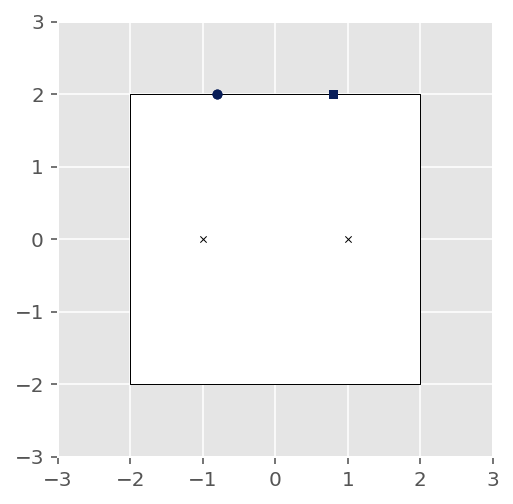

In [3]:
fs = 8000
t = np.arange(0, 3*fs)/fs

S0 = 0.5 * np.sin(2 * np.pi * 300 * t)
S1 = 0.5 * np.sign(np.sin(2 * np.pi * 1500 * t))

S0 = S0.ravel()
S1 = S1.ravel()

# create room
side = 2
corners = np.array([[-side, -side], [side, -side], [side, side], [-side, side]]).T
room = pra.Room.from_corners(corners, fs=fs, absorption=1.0)

# add sources
room.add_source([-0.8, 2.0], signal=S0)
room.add_source([0.8, 2.0], signal=S1)

# microphones
mics = pra.circular_2D_array(center=[0.,0.], M=2, phi0=0, radius=1)
room.add_microphone_array(pra.MicrophoneArray(mics, room.fs))

fig, ax = room.plot()
ax.set_xlim([-(side+1), (side+1)])
ax.set_ylim([-(side+1), (side+1)]);

In [4]:
# simulate
room.simulate()
X = room.mic_array.signals

print(X.shape)
print(S0.shape)

(2, 24236)
(24000,)


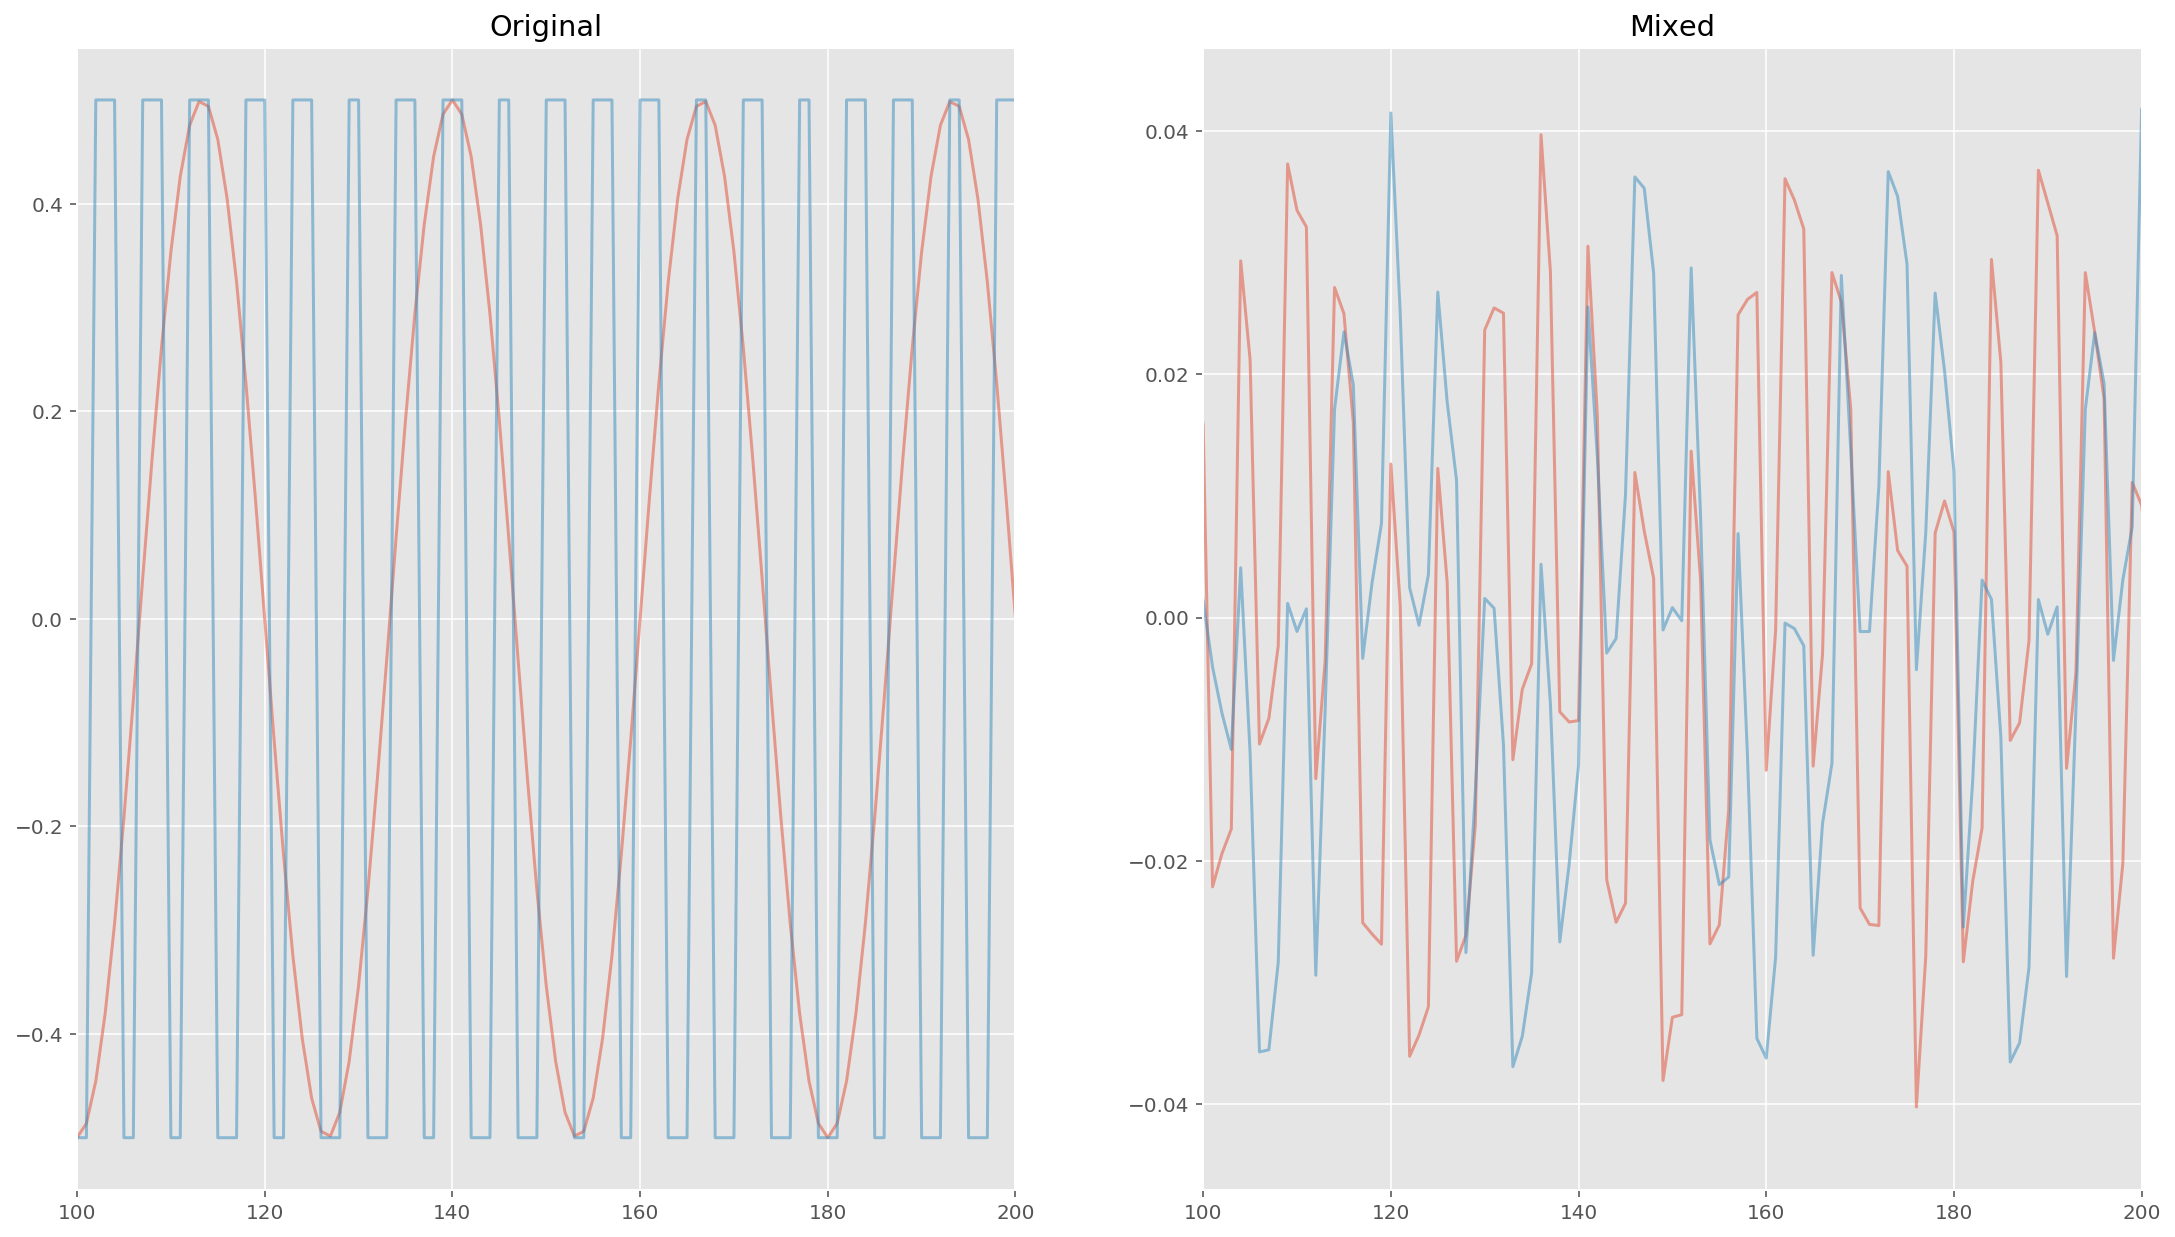

In [11]:
# define S
S = np.vstack((S0, S1))

# plot
fig, (ax1, ax2) = plt.subplots(1, 2)
ax1.set_title("Original")
ax1.plot(S.T, alpha=0.5)
ax1.set_xlim([100, 200])

ax2.set_title("Mixed")
ax2.plot(X.T, alpha=0.5)
ax2.set_xlim([100, 200])

fig.set_size_inches(18.5, 10.5)
plt.show()

In [12]:
for i in range(len(S)):
    print(f"Original Audio {i+1}")
    display(Audio(S[i], rate=fs))

for i in range(len(X)):
    print(f"Mixed Audio {i+1}")
    display(Audio(X[i], rate=fs))

Original Audio 1


Original Audio 2


Mixed Audio 1


Mixed Audio 2


In [15]:
# try to separate with ICA
ica = decomposition.FastICA(tol=1e-6)
Y = ica.fit_transform(X.T).T

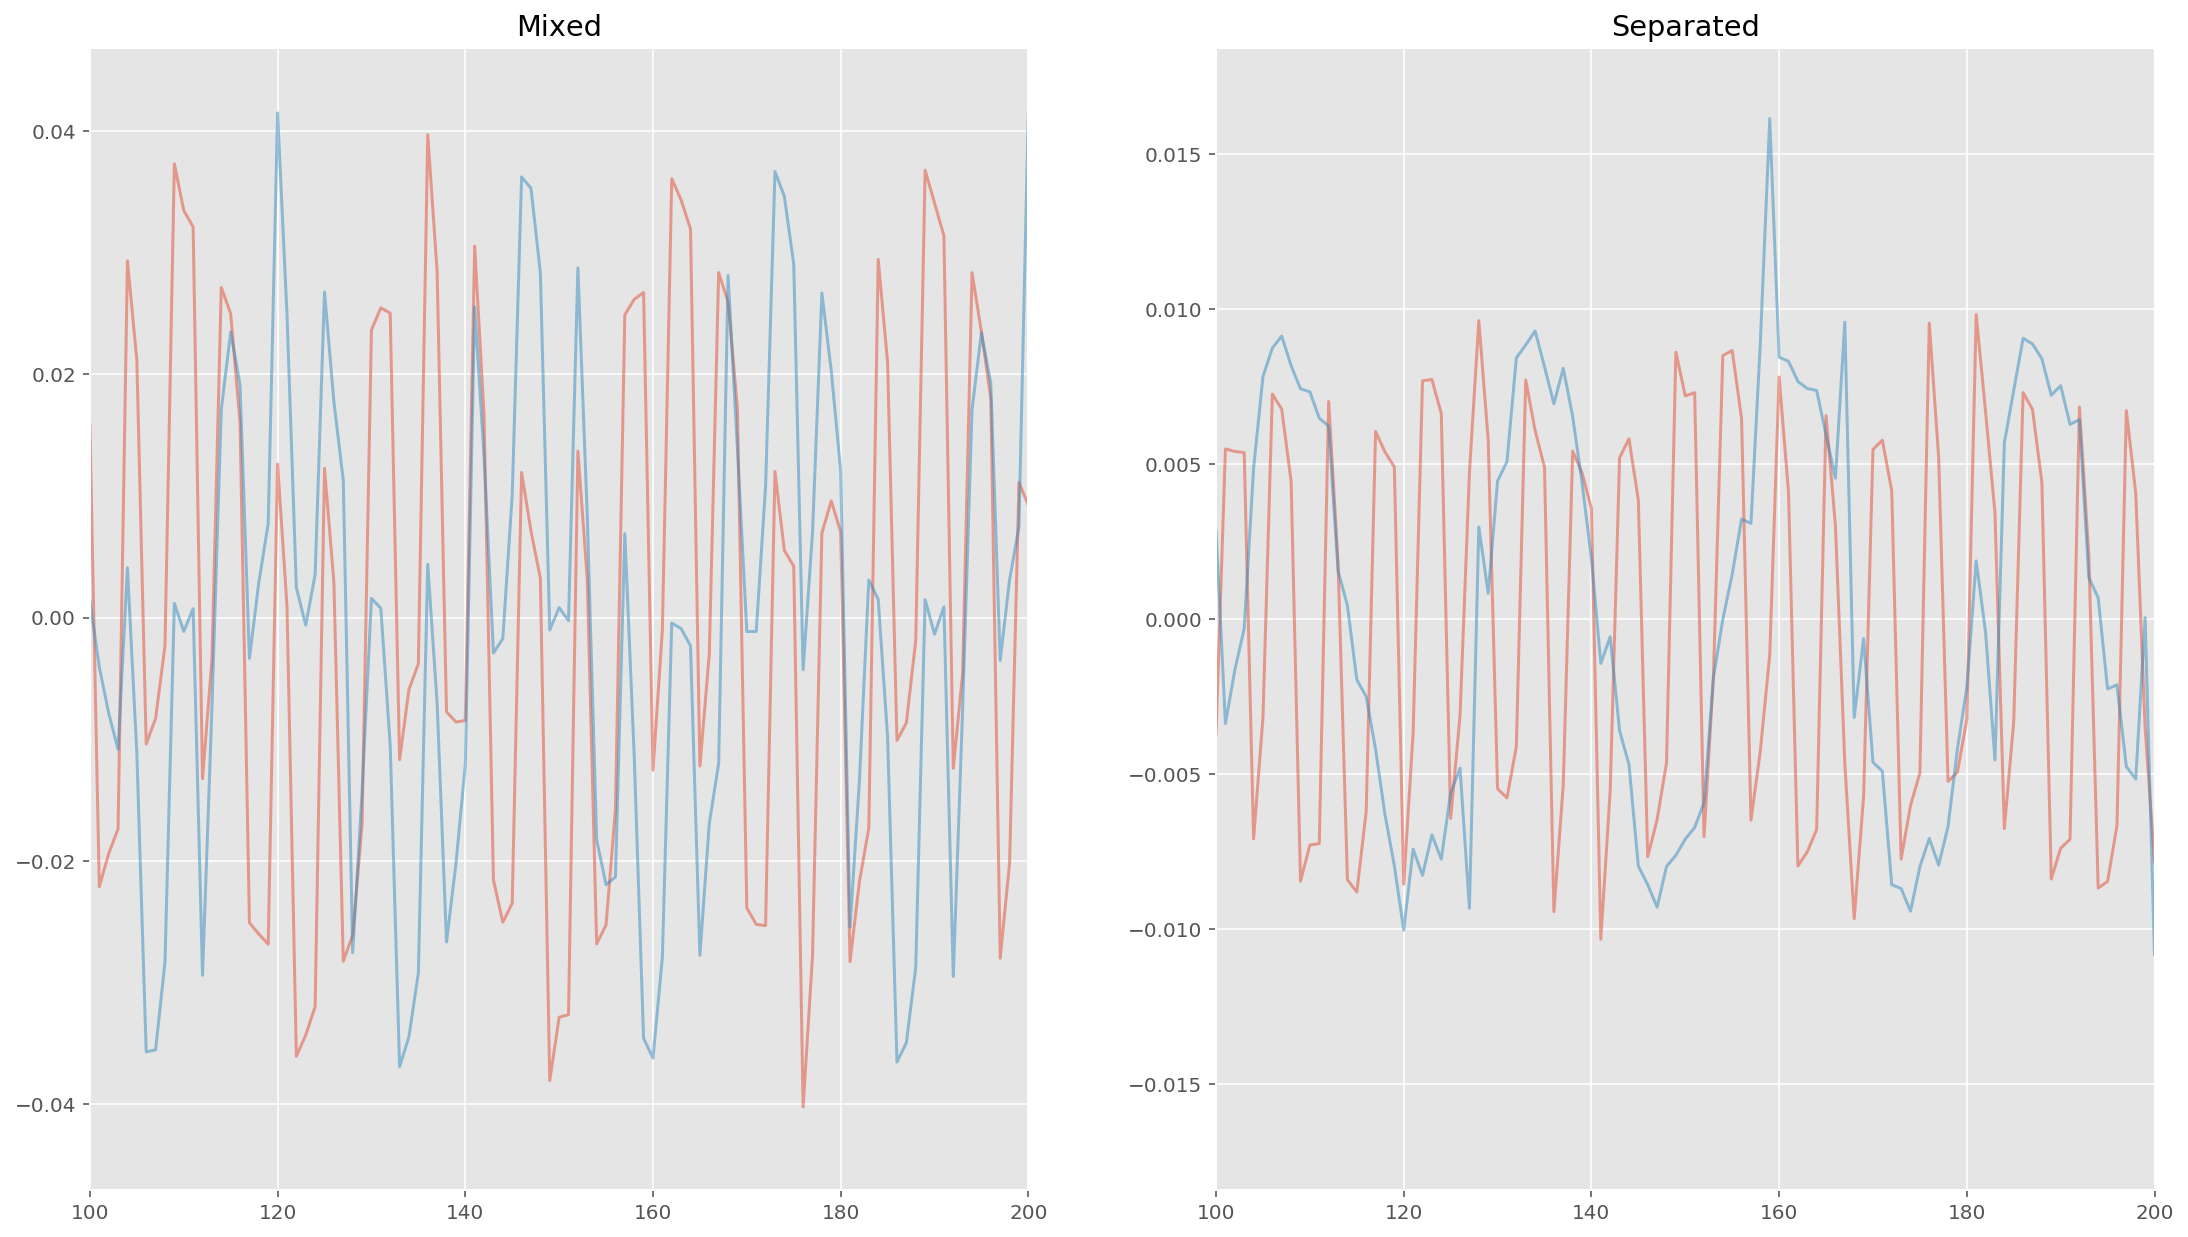

In [16]:
# plot
fig, (ax1, ax2) = plt.subplots(1, 2)
ax1.set_title("Mixed")
ax1.plot(X.T, alpha=0.5)
ax1.set_xlim([100, 200])

ax2.set_title("Separated")
ax2.plot(Y.T, alpha=0.5)
ax2.set_xlim([100, 200])

fig.set_size_inches(18.5, 10.5)
plt.show()

In [17]:
for i in range(len(Y)):
    print(f"Unmixed Audio {i+1}")
    display(Audio(Y[i], rate=fs))

Unmixed Audio 1


Unmixed Audio 2


(0, 2000)

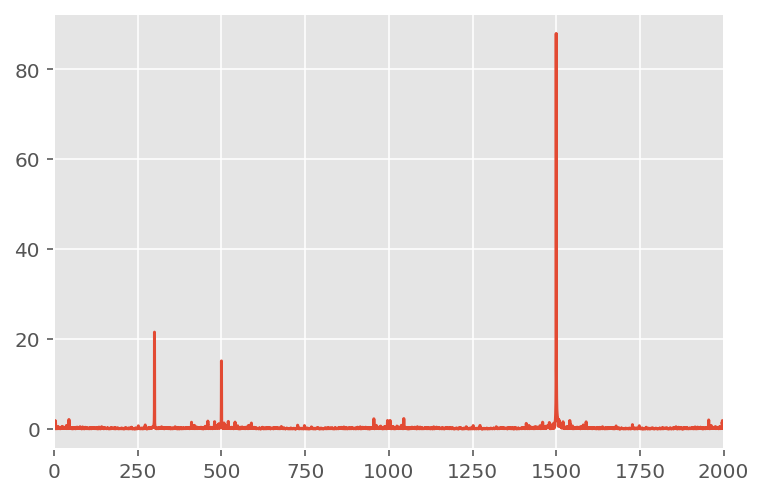

In [20]:
target = Y[0]

freq = np.fft.rfftfreq(target.shape[-1], d=1.0/fs)
plt.plot(freq, np.abs(np.fft.rfft(target)))
plt.xlim(0, 2000)